# Import packages

In [1]:
import tensorflow as tf

# Data

In [2]:
# Get data from keras datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Set the number of observations that will be used as validation set
num_validation_set = tf.cast(len(x_train) * 0.1, dtype=tf.int32)
num_validation_set

<tf.Tensor: shape=(), dtype=int32, numpy=6000>

In [4]:
# Create variables for validation set
x_validation = x_train[:num_validation_set]
y_validation = y_train[:num_validation_set]

# Exclude validation set from train sets
x_train = x_train[num_validation_set:]
y_train = y_train[num_validation_set:]

In [5]:
# Check the input shape
x_train[0].shape   

(28, 28)

# Model

### Outline the model

In [12]:
# Set the seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [13]:
# Compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

### Training

In [14]:
# Fit the model
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    validation_data=(x_validation, y_validation),
                    verbose=2)

Epoch 1/5
1688/1688 - 2s - loss: 1.6778 - accuracy: 0.7598 - val_loss: 0.5406 - val_accuracy: 0.8747 - 2s/epoch - 1ms/step
Epoch 2/5
1688/1688 - 1s - loss: 0.4578 - accuracy: 0.8808 - val_loss: 0.4540 - val_accuracy: 0.8910 - 1s/epoch - 861us/step
Epoch 3/5
1688/1688 - 1s - loss: 0.3739 - accuracy: 0.9048 - val_loss: 0.3693 - val_accuracy: 0.9077 - 1s/epoch - 866us/step
Epoch 4/5
1688/1688 - 1s - loss: 0.3318 - accuracy: 0.9147 - val_loss: 0.3236 - val_accuracy: 0.9217 - 1s/epoch - 864us/step
Epoch 5/5
1688/1688 - 1s - loss: 0.3023 - accuracy: 0.9220 - val_loss: 0.2910 - val_accuracy: 0.9305 - 1s/epoch - 860us/step


### Plot loss and accuracy curves

In [21]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
    """
    Plots loss and accuracy curves form ML model
    
    Args:
        history: history variable from model fit
    
    """
    # Get loss values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get accuracy values
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Get the range of epochs 
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

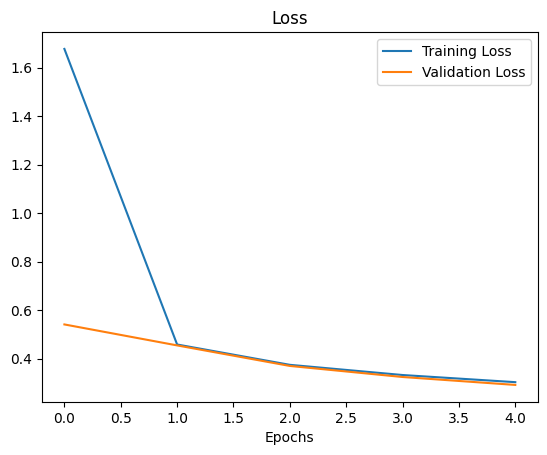

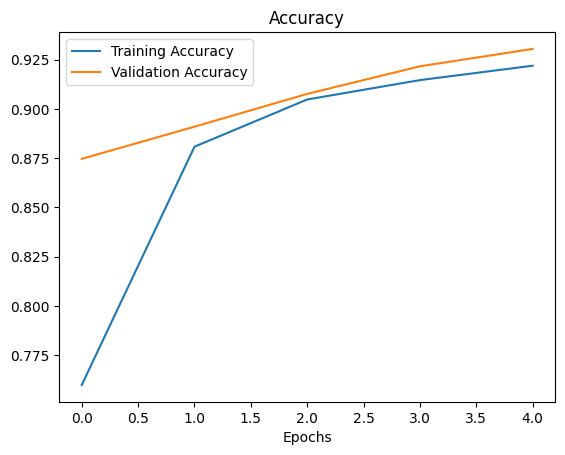

In [22]:
plot_loss_curves(history)

### Test the model

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 793us/step - loss: 0.3071 - accuracy: 0.9272


In [17]:
# Print the model evaluation results
print("Test accuracy: \t{:.2f}%\nTest loss: \t\t{:.3f}".format(test_accuracy*100., test_loss))

Test accuracy: 	92.72%
Test loss: 		0.307
